In [19]:
'''
Assignment 4
'''

%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal 

In [20]:
mpl.rcParams['figure.dpi']=100

In [21]:
# seed a random state
rng = np.random.RandomState(0)

In [28]:
# data
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])
print(x.shape)

(4,)


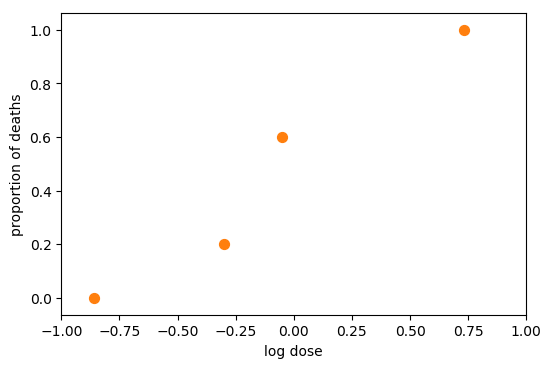

In [23]:
# plot the data
plt.scatter(x, y/n, 50, color='C1')
plt.xlim((-1, 1))
plt.xlabel('log dose')
plt.ylabel('proportion of deaths');

A=  (100,)
B=  (100,)


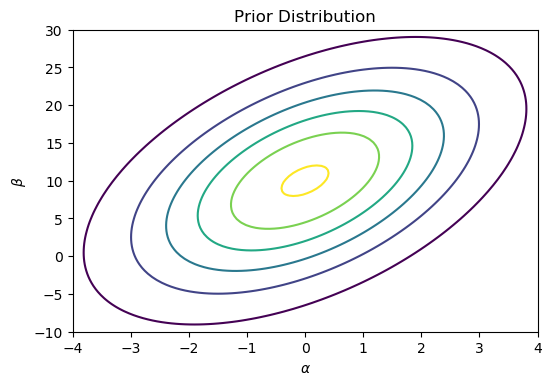

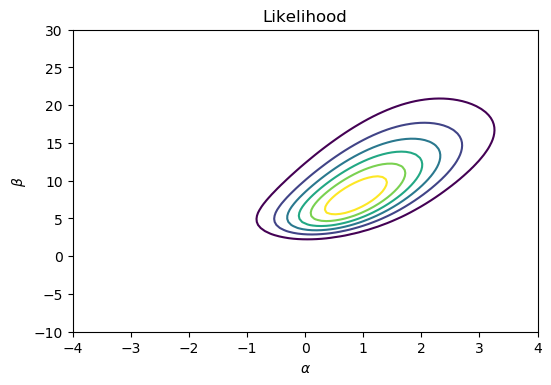

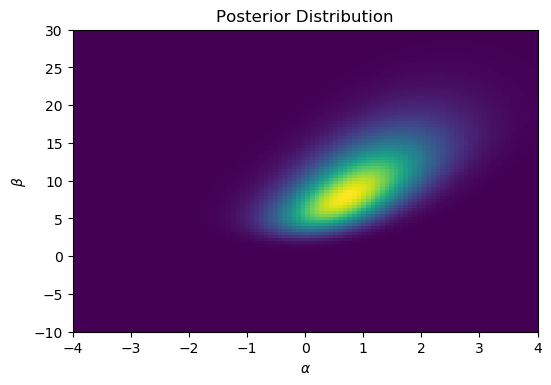

In [31]:
#Calculating posterior distribution in a grid of points 
A = np.linspace(-4, 4, 100)
B = np.linspace(-10, 30, 100)
print("A= ",A.shape)
print("B= ",B.shape)

#Defining the inverse logit function 
logit_inverse = 1 / (np.exp(-(A[:,None] + B[:,None,None] * x)) + 1)

#calculating the likelihood for all values in grid of A and B
likelihood = np.prod(logit_inverse**y * (1 - logit_inverse)**(n - y), axis=2)

# The parameters for the bivariate normal distribution
sigma_a = 2
sigma_b = 10
mu_a = 0
mu_b = 10
p = 0.5

# Creating the mean and covariance matrices for the bivariate normal distribution
mean = np.array([mu_a,mu_b])
covariance = np.array([[sigma_a**2,p*sigma_a*sigma_b],[p*sigma_a*sigma_b,sigma_b**2]])

prior = multivariate_normal(mean,covariance)

#Creating a grid of points using A nd B
xv,yv = np.meshgrid(A,B)
pos = np.empty(xv.shape + (2,))
pos[:, :, 0] = xv; pos[:, :, 1] = yv

#Calclating prior distribution for all points in the grid 
prior_dist = prior.pdf(pos)

# Posterior is prior times likelihood
posterior = np.multiply(prior_dist,likelihood)

# pLotting all 3 terms
plt.contour(A,B,prior_dist)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Prior Distribution')
plt.show()
plt.contour(A,B,likelihood)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Likelihood')
plt.show()
plt.imshow(posterior,origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Posterior Distribution')
plt.show()


## Sample draws of $\alpha$ and $\beta$ from prior 


In [10]:
# Sample 5000 values from the prior 
S =5000
samples = prior.rvs(S)

## Computing Importance Ratios for each draw
#todo write importance ratio formula


In [11]:
#Writing inverse logit function for pairs of alpha and beta
ilogit_abx = 1 / (1+np.exp(-(samples[:,0,None] + samples[:,1,None] * x)))

#calculate the likelihood s weights 
weights = np.prod(ilogit_abx**y * (1 - ilogit_abx)**(n - y), axis=1)


## Computing effective sample size $S_{eff}$

In [12]:
weights_norm = (weights)/np.sum(weights)
S_eff=1/np.sum(weights_norm**2)
print("The effective sample size S_eff if : ",S_eff)

The effective sample size S_eff if :  1352.51074284


## Computing posterior mean of $\alpha$ and $\beta$ using importance sampling 
#todo insert importance sampling mean formula

In [13]:
mean_posterior = sum(weights[:,None]*samples)/sum(weights)
print("The posterior mean of alpha : ",mean_posterior[0])
print("The posterior mean of beta  : ",mean_posterior[1])

The posterior mean of alpha :  0.945002152545
The posterior mean of beta  :  10.3981380785


## Using Importance resampling to obtain posterior samples

In [14]:
ind=rng.choice(a=S,size=1000,replace=False,p=weights_norm)
resamples = samples[ind]

print('Mean of alpha : {0}'.format(np.mean(resamples[:,0])))
print('Mean of beta : {0}'.format(np.mean(resamples[:,1])))


Mean of alpha : 0.9818164611876807
Mean of beta : 10.973717028435132


# Plotting the scatter plot of the posterior samples 

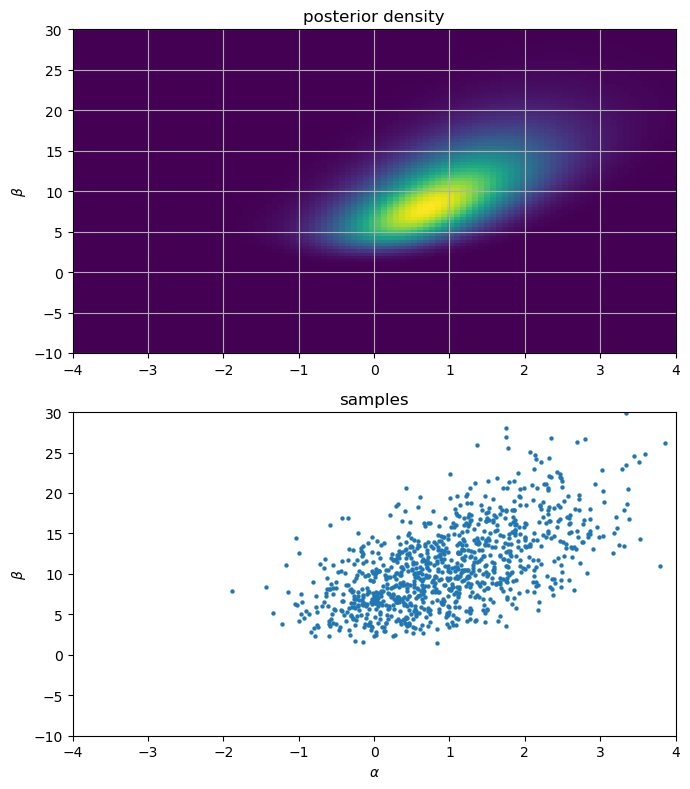

In [16]:
# create figure
fig, axes = plt.subplots(2, 1, figsize=(7, 8))

# plot the posterior density
ax = axes[0]
ax.imshow(posterior, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]))
ax.set_xlim([-4,4])
ax.set_ylim([-10,30])
ax.set_ylabel(r'$\beta$')
ax.grid(True)
ax.set_title('posterior density')

# plot the samples
ax = axes[1]
ax.scatter(resamples[:,0], resamples[:,1], 10, linewidth=0)
ax.set_xlim([-4,4])
ax.set_ylim([-10,30])
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_title('samples')

fig.tight_layout()

## Estimate for $p(\beta > 0\mid x,n,y)$  

In [17]:
beta = resamples[:,1]
alpha = resamples[:,0]
b_pos = beta>0
prob = (beta[b_pos].size/beta.size)
print("Prob p(beta>0 | x,n,y) = {0}".format(prob))

samp_ld50 = -alpha[b_pos]/beta[b_pos]

Prob p(beta>0 | x,n,y) = 1.0


# Histogram of the $LD50$ for $\beta>0$

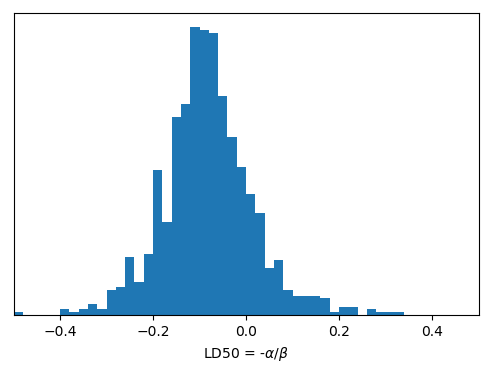

In [18]:
# plot the histogram of LD50
plt.hist(samp_ld50, np.arange(-0.5, 0.51, 0.02))
plt.xlim([-0.5, 0.5])
plt.xlabel(r'LD50 = -$\alpha/\beta$')
plt.yticks(());